<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/ANNforRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on synthetic data

In [18]:
#Install tensor flow
!pip install -q tensorflow-gpu==2.9.1
import tensorflow as tf
print(tf.__version__)

2.9.1


In [19]:
#other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [20]:
#Make the dataset
N=1000
X=np.random.random((N, 2)) * 6 - 3 #uniformly distributed between (-3, 3)
Y=np.cos(2*X[: , 0]) + np.cos(3*X[:, 1])

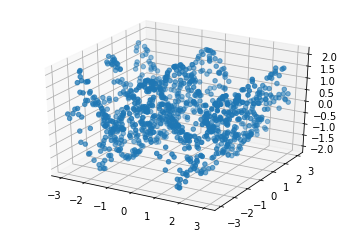

In [21]:
#plot it
fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:, 1], Y)

In [22]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
  ])

In [23]:
#compile and fit
opt=tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r=model.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0225
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9619
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9597
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9598
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8974
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8609
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7727
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7261
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6328
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5894
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5717
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5393
Epoch 13/100
32/32 [=================

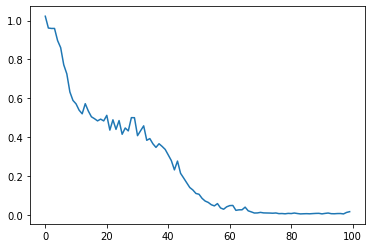

In [24]:
#plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 1ms/step


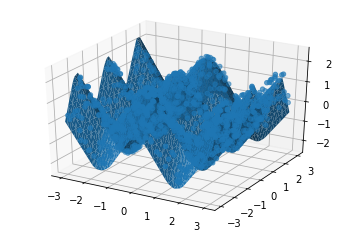

In [31]:
#Plot the prediction surface
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#surface plot
line =np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()